In [1]:
import pandas as pd
import requests
import re
import time
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib
from IPython.core.pylabtools import figsize

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Functions

In [3]:
def fetch(url):
    """
    Use BeautifulSoup to get the text of a web page.
    """
    r = requests.get(url)
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("", r.text), "html.parser")
    return soup

Steps:
- Go to season page at Kenpom and get rank, school and conference
- Plot boxplot of rankings grouped by conference

In [4]:
def get_season_ranking(year):
    kenpom_url = 'https://kenpom.com/index.php'
    season_url = f'{kenpom_url}?y={year}'
    season_rk_soup = fetch(season_url)
    rk_table = season_rk_soup.find_all('table', {'id': 'ratings-table'})[0]
    
    data = []
    for row in rk_table.find_all('tr'):
        if len(row.find_all('td', {'class': 'hard_left'})) != 0:
            rk = row.find_all('td', {'class': 'hard_left'})[0].text
            school = row.find_all('td', {'class': 'next_left'})[0].a.text
            conf = row.find_all('td', {'class': 'conf'})[0].text
            data.append([year, rk, school, conf])
    
    df = pd.DataFrame(data, columns=['赛季', '排名', '球队', '赛区'])
    df['排名'] = df['排名'].apply(int)
    return df

In [5]:
def plot_conf_strength(year, return_conf_strength=False):
    # Get season rankings
    season = f'{year-1}-{str(year)[2:]}'
    print(f'Season: {season}')
    df = get_season_ranking(year)
    
    # Get conference rankings by median ranking of schools
    conf_rank = df.groupby('赛区')['排名'].median().sort_values().index
    conf_rank_dict = {conf: rk for rk, conf in enumerate(conf_rank, 1)}
    df['赛区排名'] = df['赛区'].map(conf_rank_dict)
    df_sorted = df.sort_values('赛区排名').drop('赛区排名', axis=1)
    
    if return_conf_strength:
        return conf_rank_dict
    else:
        print('Conference Rankings:')
        for key in conf_rank_dict.keys():
            print(f'{conf_rank_dict[key]} {key}')
        print()

        # Plot
        sns.boxplot(x="排名", y="赛区", data=df_sorted).set_title(f'{season} NCAA一级联盟各赛区Kenpom排名')

## EDA

Get 10-year conference rankings

In [6]:
conf_rank_season_dict = {year: plot_conf_strength(year, return_conf_strength=True)
                         for year in range(2012, 2022)}

Season: 2011-12
Season: 2012-13
Season: 2013-14
Season: 2014-15
Season: 2015-16
Season: 2016-17
Season: 2017-18
Season: 2018-19
Season: 2019-20
Season: 2020-21


In [7]:
conf_rk_dfs = []
for year in range(2012, 2022):
    temp = pd.DataFrame()
    temp['赛区'] = conf_rank_season_dict[year].keys()
    temp['排名'] = temp['赛区'].map(conf_rank_season_dict[year])
    conf_rk_dfs.append(temp)
pd.concat(conf_rk_dfs).groupby('赛区')[['排名']].mean().sort_values('排名').reset_index()

,赛区,排名
0,B12,1.300
1,B10,2.700
2,BE,3.400
3,ACC,3.800
4,P12,5.000
5,SEC,5.400
6,Amer,7.375
7,A10,8.500
8,MWC,8.900
9,WCC,11.100


## Visualization

In [8]:
sns.set()
matplotlib.rc('font', family='Heiti TC')

### 2021

Season: 2020-21
Conference Rankings:
1 B12
2 B10
3 P12
4 SEC
5 ACC
6 BE
7 WCC
8 A10
9 Amer
10 MAC
11 SC
12 MVC
13 CUSA
14 MWC
15 Sum
16 BW
17 CAA
18 Ivy
19 SB
20 BSky
21 WAC
22 Horz
23 AE
24 OVC
25 BSth
26 MAAC
27 Pat
28 ASun
29 NEC
30 MEAC
31 Slnd
32 SWAC



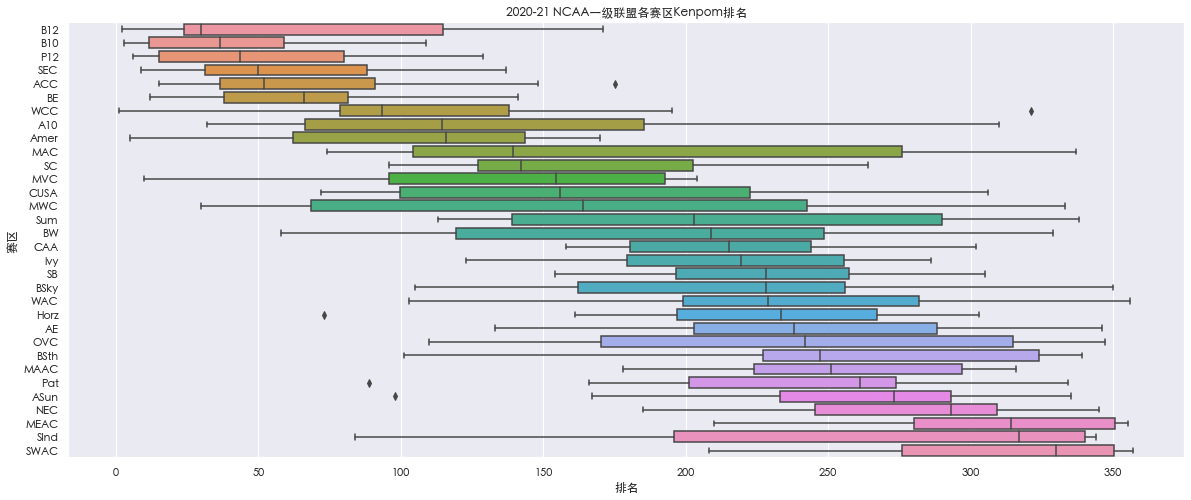

In [9]:
figsize(20, 8)
plot_conf_strength(2021)

### 2020

Season: 2019-20
Conference Rankings:
1 B10
2 BE
3 B12
4 P12
5 ACC
6 SEC
7 Amer
8 MWC
9 A10
10 WCC
11 MVC
12 SC
13 SB
14 MAC
15 Ivy
16 CUSA
17 BSky
18 CAA
19 Sum
20 BW
21 Horz
22 Pat
23 WAC
24 MAAC
25 AE
26 NEC
27 Slnd
28 OVC
29 ASun
30 BSth
31 SWAC
32 MEAC



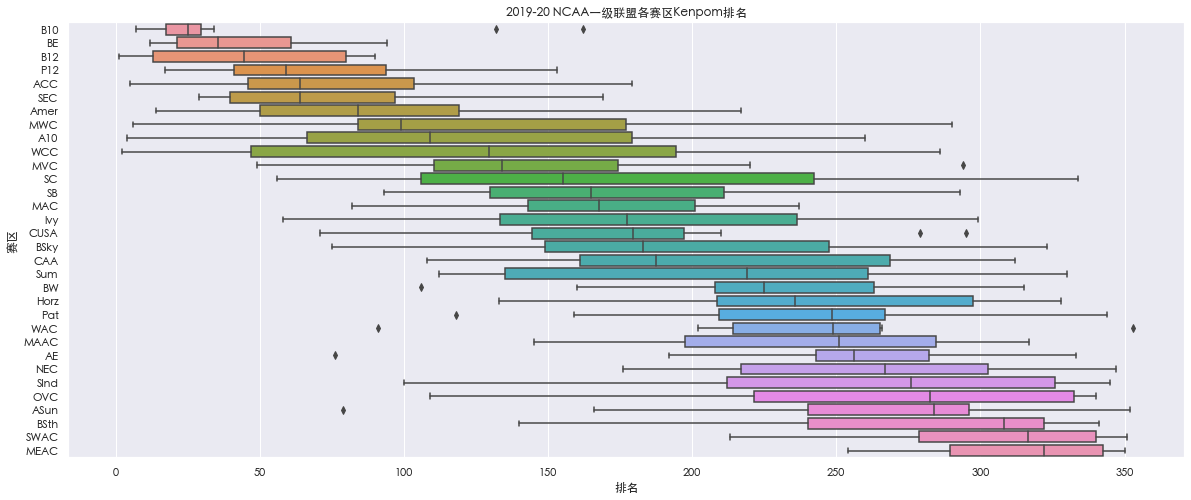

In [10]:
figsize(20, 8)
plot_conf_strength(2020)

### 2019

Season: 2018-19
Conference Rankings:
1 B12
2 ACC
3 B10
4 SEC
5 BE
6 Amer
7 P12
8 WCC
9 MAC
10 CUSA
11 Ivy
12 A10
13 MWC
14 SB
15 SC
16 MVC
17 BSth
18 WAC
19 Horz
20 ASun
21 BW
22 Sum
23 Pat
24 AE
25 CAA
26 OVC
27 NEC
28 BSky
29 MAAC
30 Slnd
31 SWAC
32 MEAC



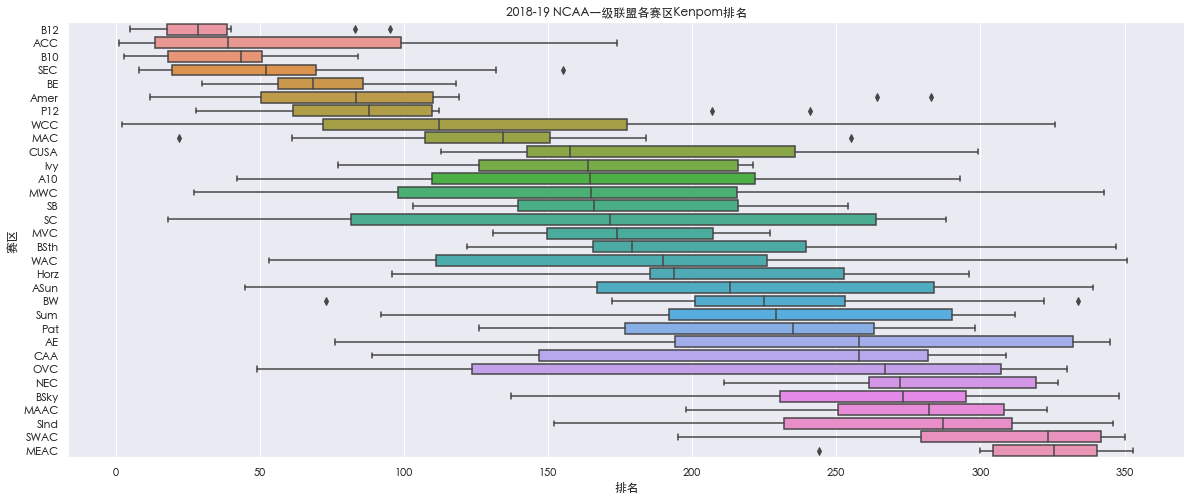

In [11]:
figsize(20, 8)
plot_conf_strength(2019)

### 2018

Season: 2017-18
Conference Rankings:
1 B12
2 ACC
3 BE
4 SEC
5 B10
6 P12
7 MWC
8 Amer
9 MVC
10 CUSA
11 A10
12 WCC
13 MAC
14 BW
15 Sum
16 BSky
17 CAA
18 SB
19 MAAC
20 Ivy
21 WAC
22 AE
23 Horz
24 BSth
25 SC
26 OVC
27 Pat
28 Slnd
29 NEC
30 ASun
31 MEAC
32 SWAC



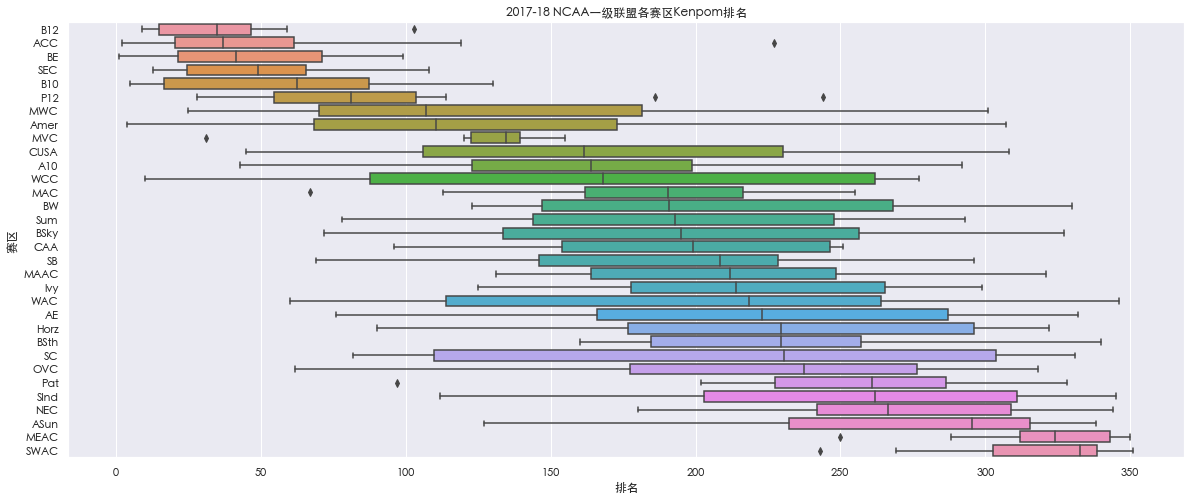

In [12]:
figsize(20, 8)
plot_conf_strength(2018)

### 2017

Season: 2016-17
Conference Rankings:
1 B12
2 BE
3 ACC
4 B10
5 SEC
6 P12
7 Amer
8 MWC
9 A10
10 SC
11 CAA
12 WCC
13 MVC
14 MAC
15 SB
16 Sum
17 WAC
18 Ivy
19 MAAC
20 AE
21 Horz
22 OVC
23 CUSA
24 Pat
25 Slnd
26 BSky
27 ASun
28 NEC
29 BW
30 BSth
31 SWAC
32 MEAC



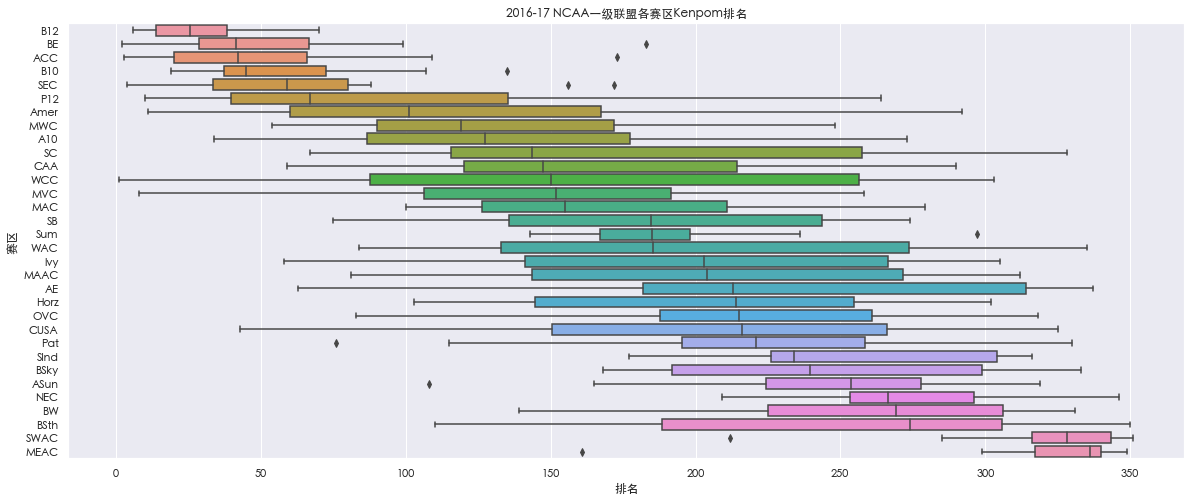

In [13]:
figsize(20, 8)
plot_conf_strength(2017)